In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.parse
import urllib.request
import json

baseURL = "http://localhost/HerschelWs/Api/"

def openURL(url, values, headers):
    if values == None:
        url = baseURL + url
    else:
        params = urllib.parse.urlencode(values)
        url = baseURL + url + '?' + params
    req = urllib.request.Request(url, headers=headers)
    with urllib.request.urlopen(req) as response:
        data = response.read()
        data = data.decode("ascii")
        return data
    
def openTable(url, params):
    data = openURL(url, params, {'Accept': 'text/plain'})
    return np.loadtxt(data.splitlines())

def openJSON(url, params):
    data = openURL(url, params, {'Accept': 'application/json'})
    return json.loads(data)

def findObsIntersect(inst, region):
    url = "Observations"
    params = { "findby": "intersect", "inst": inst, "region": region }
    return openJSON(url, params)

def getObsPoints(inst, obsID, res):
    url = "Observations/" + inst + "/" + str(obsID) + "/Footprint/Outline/Points"
    params = { "res": res }
    return openTable(url, params)

In [123]:
openTable("Observations/PACS/1342211692/Footprint/Outline/Points", {"res": 2})

array([[  0.00000000e+00,   1.66444287e+02,   1.77656585e-02],
       [  0.00000000e+00,   1.66438889e+02,   5.87854125e-03],
       [  0.00000000e+00,   1.66451915e+02,  -3.70475685e-05],
       [  0.00000000e+00,   1.66457314e+02,   1.18500696e-02],
       [  0.00000000e+00,   1.66444287e+02,   1.77656585e-02],
       [  0.00000000e+00,   1.66444808e+02,   1.89018478e-02],
       [  1.00000000e+00,   1.66444291e+02,   1.77641186e-02],
       [  1.00000000e+00,   1.66457314e+02,   1.18500320e-02],
       [  1.00000000e+00,   1.66457831e+02,   1.29877633e-02],
       [  1.00000000e+00,   1.66444808e+02,   1.89018478e-02]])

In [124]:
openJSON("Observations/PACS/1342211692", None)

{'aor': 'ngc3521 Enuc_03 [faint] - oI',
 'aot': 'Line Spectroscopy',
 'aper': 0.013888,
 'band': '',
 'calib': False,
 'dec': -0.0182435476112429,
 'end': {'value': -9999},
 'failed': False,
 'inst': 'Pacs',
 'instMode': 'PacsSpectroLine',
 'object': 'ngc3521',
 'obsID': 1342211692,
 'obsLevel': 20,
 'pa': 114.429694619003,
 'pointingMode': 4,
 'proposer': 'KPOT_rkennicu_1',
 'ra': 166.456279784938,
 'repetitions': 4,
 'sso': False,
 'start': {'value': -9999},
 'type': 2}

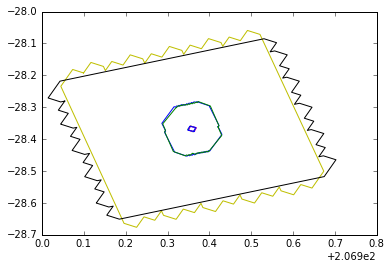

In [10]:
obs = findObsIntersect("PACS", "CIRCLE J2000 207.25 -28.4 20")
for o in obs:
    points = getObsPoints(o["inst"], o["obsID"], 0.2)
    plt.plot(points[:,1], points[:,2], '-')

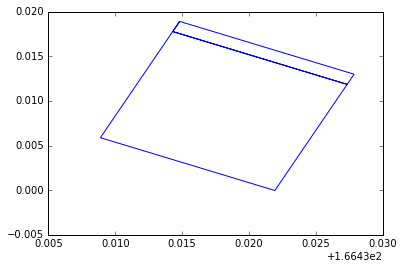

In [52]:
points = openTable("Observations/PACS/1342211692/Footprint/Outline/Points", {"res": 2})
plot(points[:,1], points[:,2], '-')

In [27]:
print(findObsIntersect("PACS", "CIRCLE J2000 10 10 100"))

AttributeError: 'module' object has no attribute 'quote'

In [4]:
import urllib.parse
urllib.parse.quote('test assad')

'test%20assad'